In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from matplotlib.lines import Line2D
from geopy.distance import geodesic

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)
df_riv = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/river_discharge_date.csv', sep=',', index_col=0)

flux_cdom_bc_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_350.csv', sep=',', index_col=0)
flux_cdom_bc_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_412.csv', sep=',', index_col=0)

flux_cdom_pw_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_350.csv', sep=',', index_col=0)
flux_cdom_pw_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_412.csv', sep=',', index_col=0)


flux_doc_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_bc.csv', sep=',', index_col=0)
flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)

flux_doc_pw = flux_doc_pw.drop("St.9_GOM2021", axis=0)
flux_doc_pw = flux_doc_pw.drop("St.4_GOM2021", axis=0)
flux_doc_pw = flux_doc_pw.drop("St.5B_GOM2021", axis=0)

flux_tn_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_bc.csv', sep=',', index_col=0)
flux_tn_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_pw.csv', sep=',', index_col=0)

flux_fe2_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_bc.csv', sep=',', index_col=0)
flux_fe2_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_pw.csv', sep=',', index_col=0)
flux_fe3_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_bc.csv', sep=',', index_col=0)
flux_fe3_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_pw.csv', sep=',', index_col=0)

fe_stocks_5cm = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks_5CM.csv', sep=',', index_col=0)
fe_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks.csv', sep=',', index_col=0)

flux_inflection_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_inflection_bc.csv', sep=',', index_col=0)

ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
wc_doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Water_col_DOC_stocks.csv', sep=',', index_col=0)

In [3]:
flux_cdom_bc_412_join = flux_cdom_bc_412['bc_flux_aCDOM412']
flux_cdom_bc_350_join = flux_cdom_bc_350['bc_flux_aCDOM350']

flux_cdom_pw_350_join = flux_cdom_pw_350['pw_flux_aCDOM350']
flux_cdom_pw_412_join = flux_cdom_pw_412['pw_flux_aCDOM412']


flux_doc_bc_join = flux_doc_bc['bc_flux_doc']

flux_doc_pw_join = flux_doc_pw['pw_flux_doc']
flux_doc_pw_error_join = flux_doc_pw['pw_flux_doc_error']

flux_tn_bc_join = flux_tn_bc['bc_flux_tn']

flux_tn_pw_join = flux_tn_pw['pw_flux_tn']
flux_tn_pw_error_join = flux_tn_pw['pw_flux_tn_error']

flux_fe2_bc_join = flux_fe2_bc['bc_flux_fe2']

flux_fe2_pw_join = flux_fe2_pw['pw_flux_fe2']
flux_fe2_pw_error_join = flux_fe2_pw['pw_flux_fe2_error']

flux_fe3_bc_join = flux_fe3_bc['bc_flux_fe3']

flux_fe3_pw_join = flux_fe3_pw['pw_flux_fe3']
flux_fe3_pw_error_join = flux_fe3_pw['pw_flux_fe3_error']


fe_stocks_join = fe_stocks.drop(columns=['camp', 'Stn'])
df_riv = df_riv.drop(columns=['date'])

df = df_o2.join(ncs_stocks)
df = df.join(df_riv)
df = df.join(fe_stocks_join)
df = df.join(wc_doc_stocks)
df = df.join(flux_inflection_bc)

df = df.join(flux_cdom_bc_412_join)
df = df.join(flux_cdom_pw_412_join)

df = df.join(flux_cdom_bc_350_join)
df = df.join(flux_cdom_pw_350_join)

df = df.join(flux_doc_bc_join)
df = df.join(flux_doc_pw_join)
df = df.join(flux_doc_pw_error_join)

df = df.join(flux_tn_bc_join)
df = df.join(flux_tn_pw_join)
df = df.join(flux_tn_pw_error_join)

df = df.join(flux_fe2_bc_join)
df = df.join(flux_fe2_pw_join)
df = df.join(flux_fe2_pw_error_join)

df = df.join(flux_fe3_bc_join)
df = df.join(flux_fe3_pw_join)
df = df.join(flux_fe3_pw_error_join)

df['Camp'] = df["camp"]
df['Stn'] = df["station"]
df = df.drop(columns=['code.1'])

df['rgn'] = 'default'

df.loc[df['station'].isin(['St.2', 'St.16', 'St.16-2']), 'rgn'] = 'riv'
df.loc[df['station'].isin(['St.5B', 'St.MK', 'St.MK-2', 'St.ML', 'St.4', 'St.6']), 'rgn'] = 'hypox'
df.loc[df['station'].isin(['St.7', 'St.9', 'St.14', 'St.14.5']), 'rgn'] = 'shelf'
df.loc[df['station'].isin(['St.11', 'St.12', 'St.13', 'St.15']), 'rgn'] = 'slope'

df['season'] = 'default'

df.loc[df['camp'].isin(['GOM21FA']), 'season'] = 'fall'
df.loc[df['camp'].isin(['GOM22SU', 'GOM2021']), 'season'] = 'summer'
df.loc[df['camp'].isin(['GOM22SP']), 'season'] = 'spring'

df['OCkg_5cm_deep_M3'] = df['OCg_5cm_deep/M2'] / 1000

df['Date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['Date'].dt.dayofyear
df['day_of_year']

# Function to calculate distance
def calculate_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, -89.24593056)  # Coordinates of delta
    return geodesic(start, end).kilometers

# Apply function to create new column
df['distance_to_delta_km'] = df.apply(calculate_distance, axis=1)

df.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_Stock_O2_summary.csv')

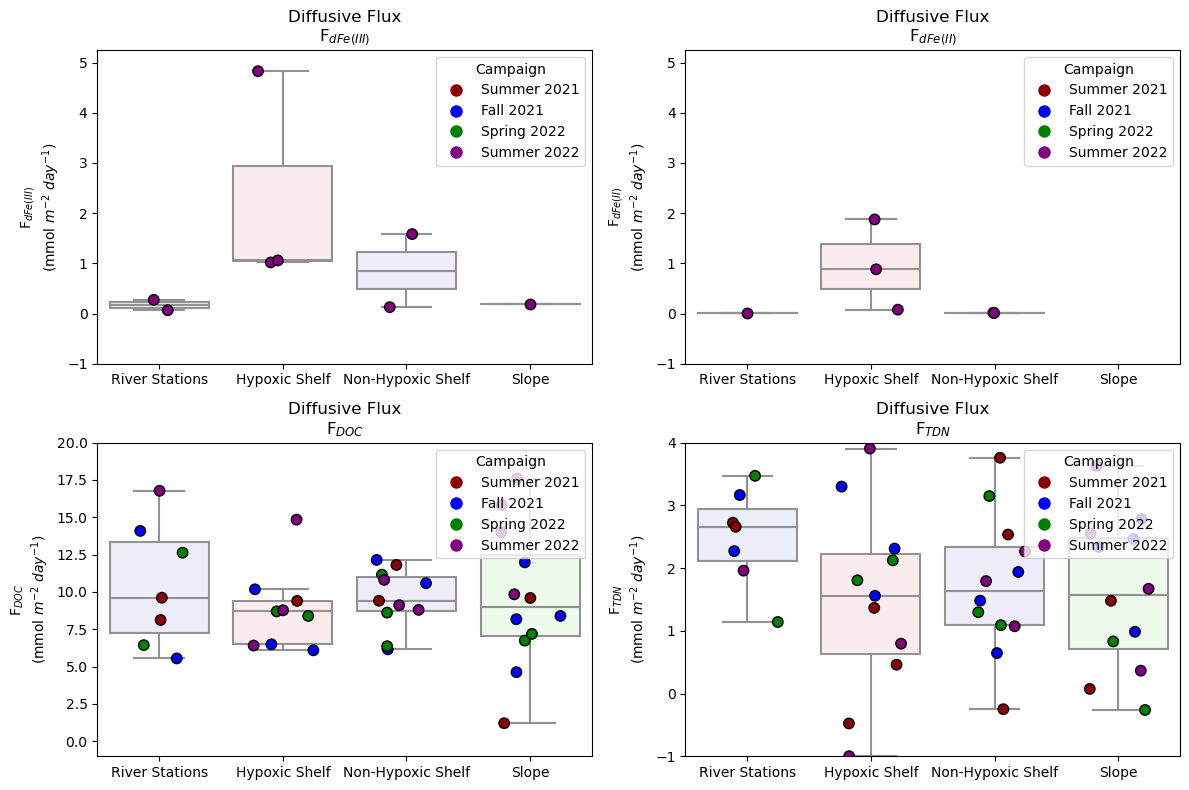

In [4]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 20), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "pw_flux_tn"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
    axes.flatten()[i].set_title(variable_title_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
    
# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits
    ax.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper right')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


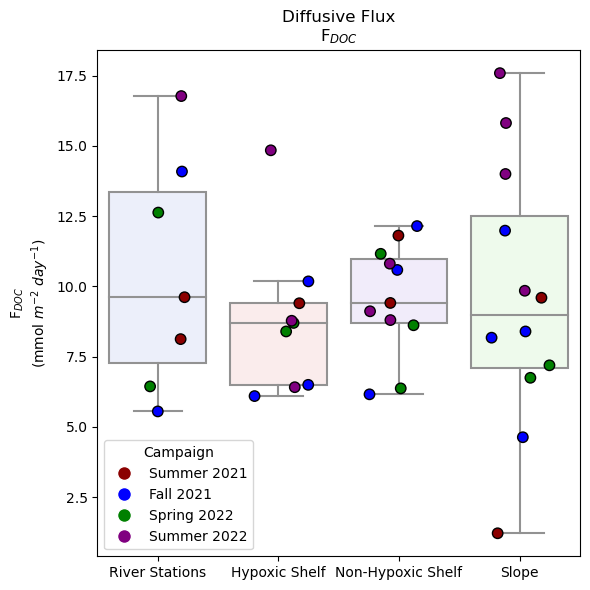

In [5]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}


var = 'pw_flux_doc'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

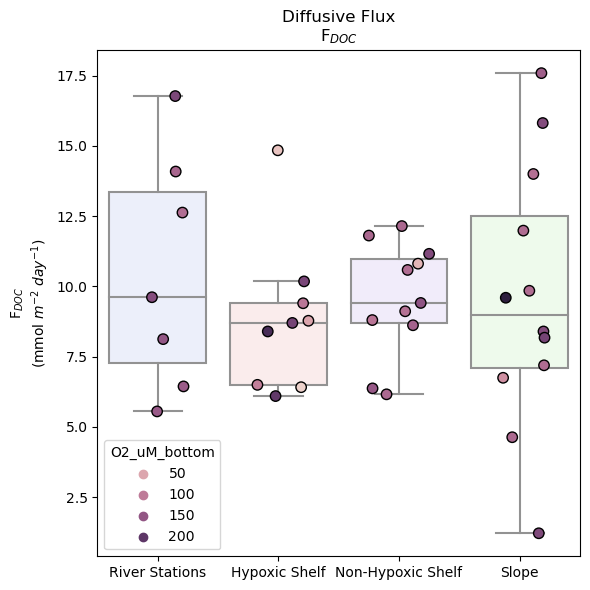

In [6]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

marker_map = {
    'GOM2021': 'o',
    'GOM21FA': 'p',
    'GOM22SP': 'D',
    'GOM22SU': '8'
}


var = 'pw_flux_doc'


# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='O2_uM_bottom', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black')
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

#legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
#axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

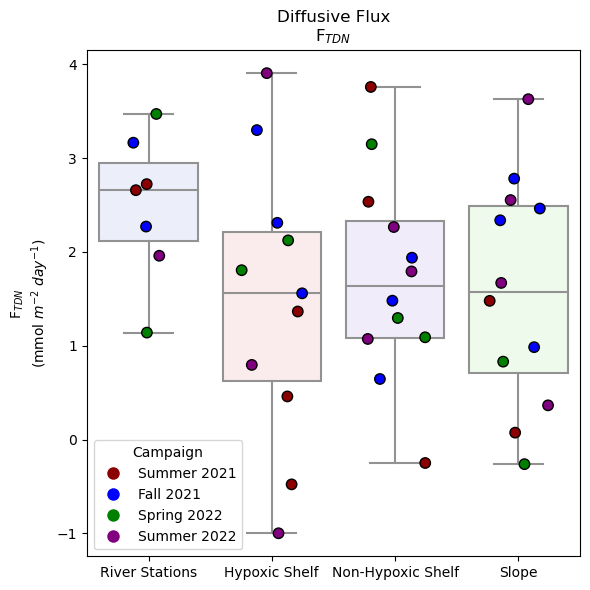

In [7]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 40), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'pw_flux_tn'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

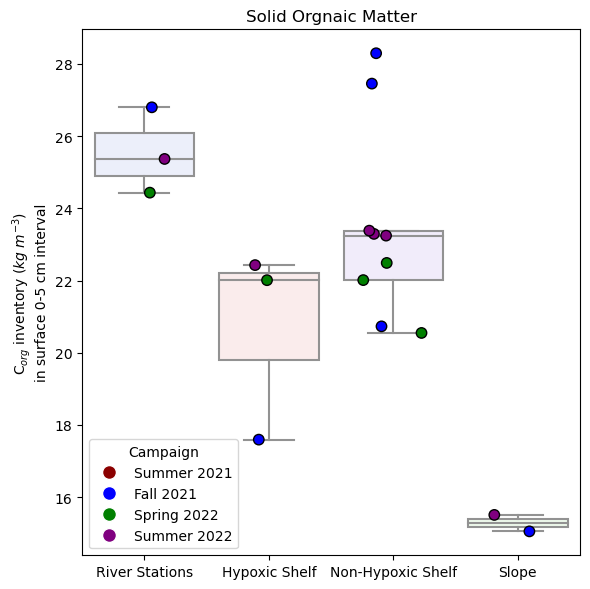

In [8]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'OCkg_5cm_deep_M3': r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'OCkg_5cm_deep_M3': 'Solid Orgnaic Matter',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'OCkg_5cm_deep_M3': (0, 1500), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'OCkg_5cm_deep_M3'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

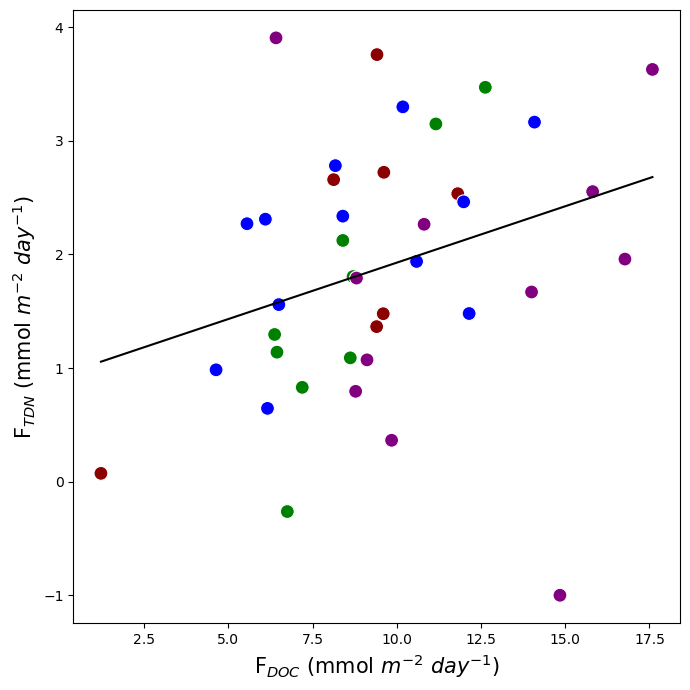

In [9]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'pw_flux_tn'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('pw_flux_tn', r'F$_{TDN}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

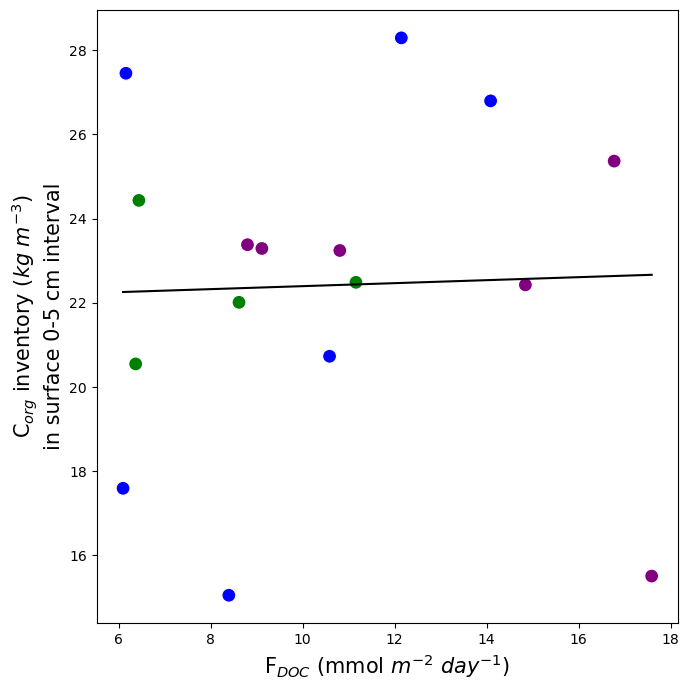

In [10]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'OCkg_5cm_deep_M3'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('OCkg_5cm_deep_M3', r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

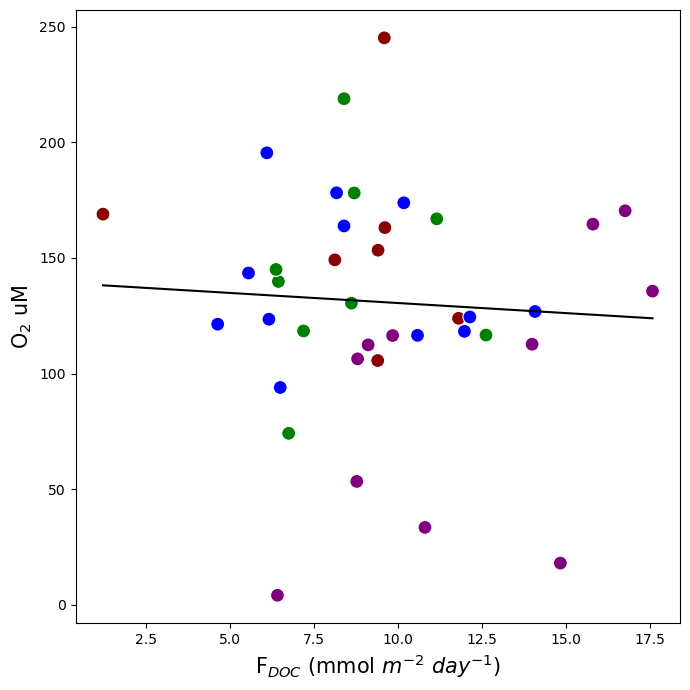

In [11]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'O2_uM_bottom'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('O2_uM_bottom', r'O$_{2}$ uM'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

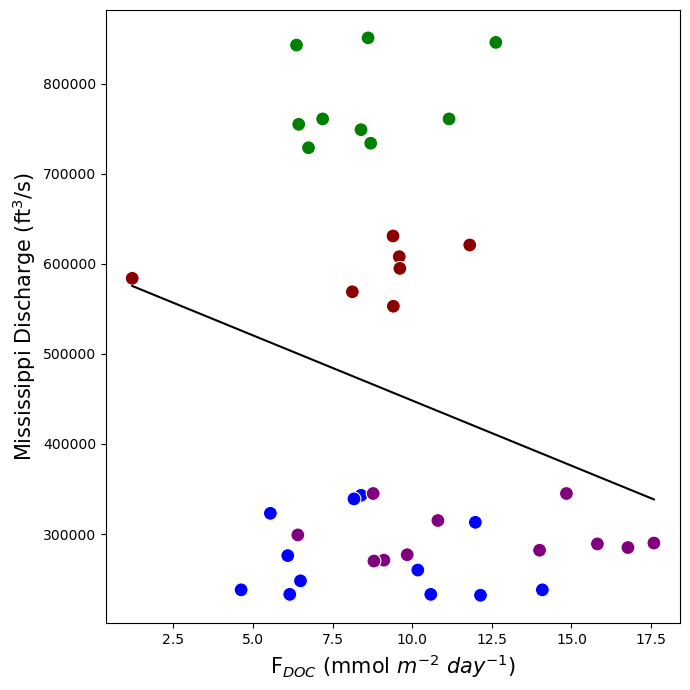

In [12]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'discharge_mi_ftps'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('discharge_mi_ftps', 'Mississippi Discharge ($\mathrm{ft^3/s}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

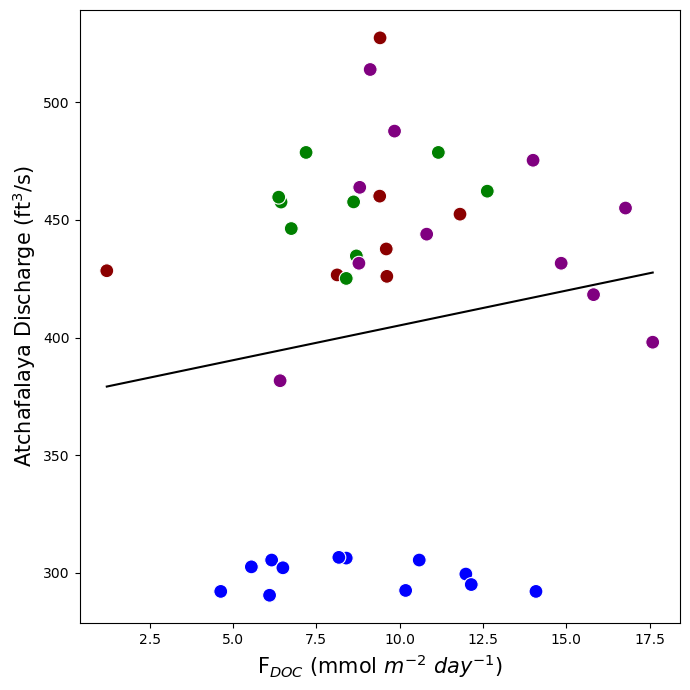

In [13]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'discharge_af_ftps'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('discharge_af_ftps', 'Atchafalaya Discharge ($\mathrm{ft^3/s}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

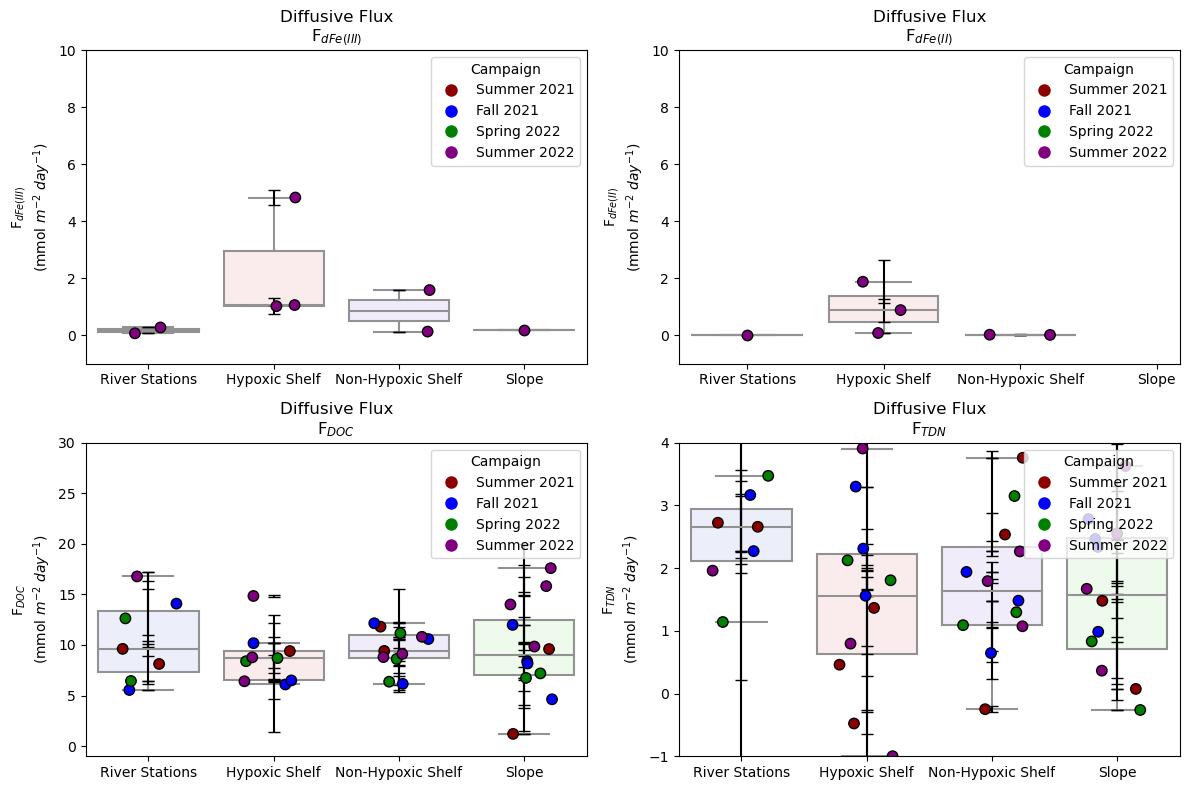

In [14]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 10),
    'pw_flux_fe2': (-1, 10),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "pw_flux_tn"]
errors_to_plot = ["pw_flux_fe3_error", "pw_flux_fe2_error","pw_flux_doc_error", "pw_flux_tn_error"]


# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
    axes.flatten()[i].set_title(variable_title_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
    x_values = df['rgn']  # Assuming 'rgn' is the x-axis variable
    y_values = df[var]  # Assuming 'var' is the y-axis variable
    y_errors = df[errors_to_plot[i]]  # Assuming 'error_column' contains the errors
    axes.flatten()[i].errorbar(x_values, y_values, yerr=y_errors, fmt='none', color='black', capsize=4)

# Define legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]

# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits
    ax.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


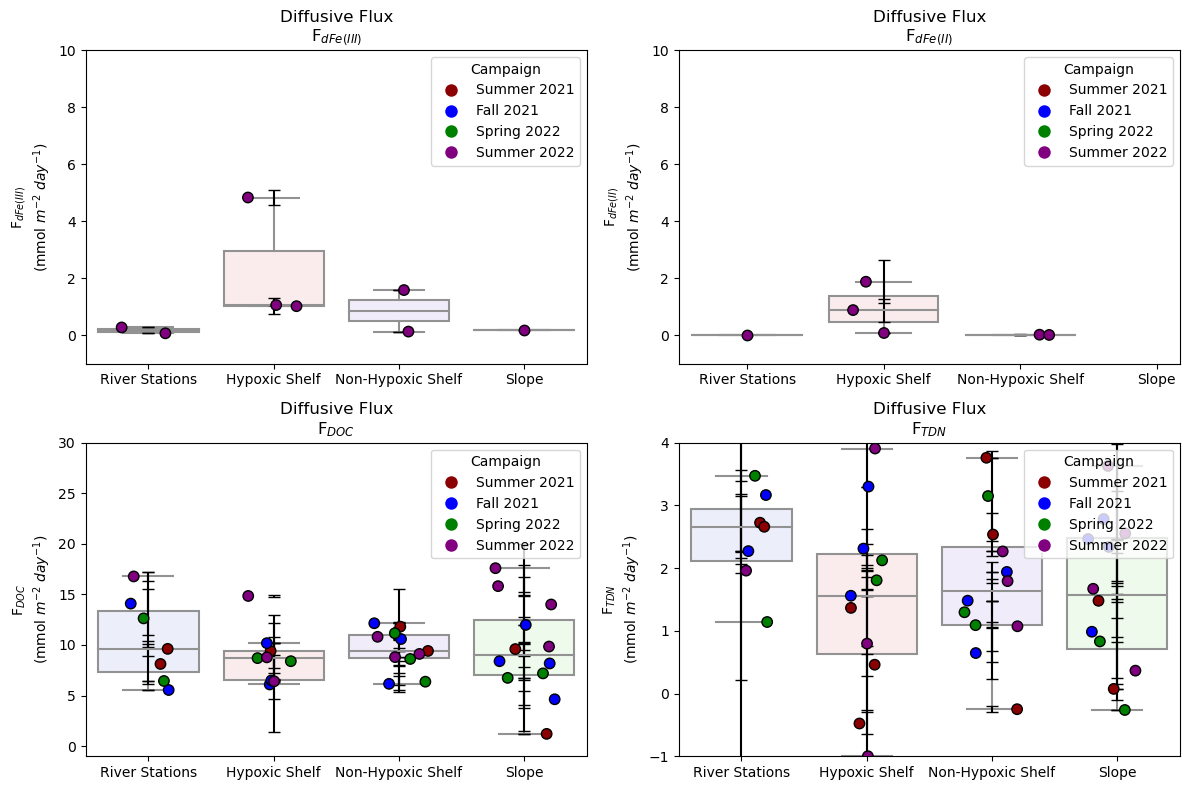

In [15]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 10),
    'pw_flux_fe2': (-1, 10),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "pw_flux_tn"]
errors_to_plot = ["pw_flux_fe3_error", "pw_flux_fe2_error","pw_flux_doc_error", "pw_flux_tn_error"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
    axes.flatten()[i].set_title(variable_title_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
    x_values = df['rgn']  # Assuming 'rgn' is the x-axis variable
    y_values = df[var]  # Assuming 'var' is the y-axis variable
    y_errors = df[errors_to_plot[i]]  # Assuming 'error_column' contains the errors
    axes.flatten()[i].errorbar(x_values, y_values, yerr=y_errors, fmt='none', color='black', capsize=4)

# Define legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]

# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits
    ax.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


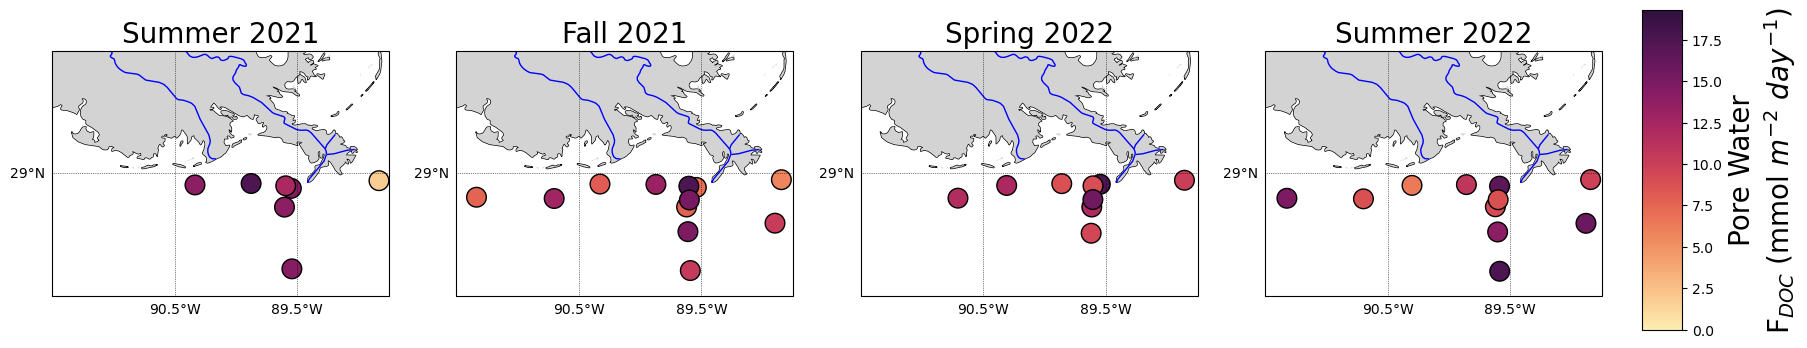

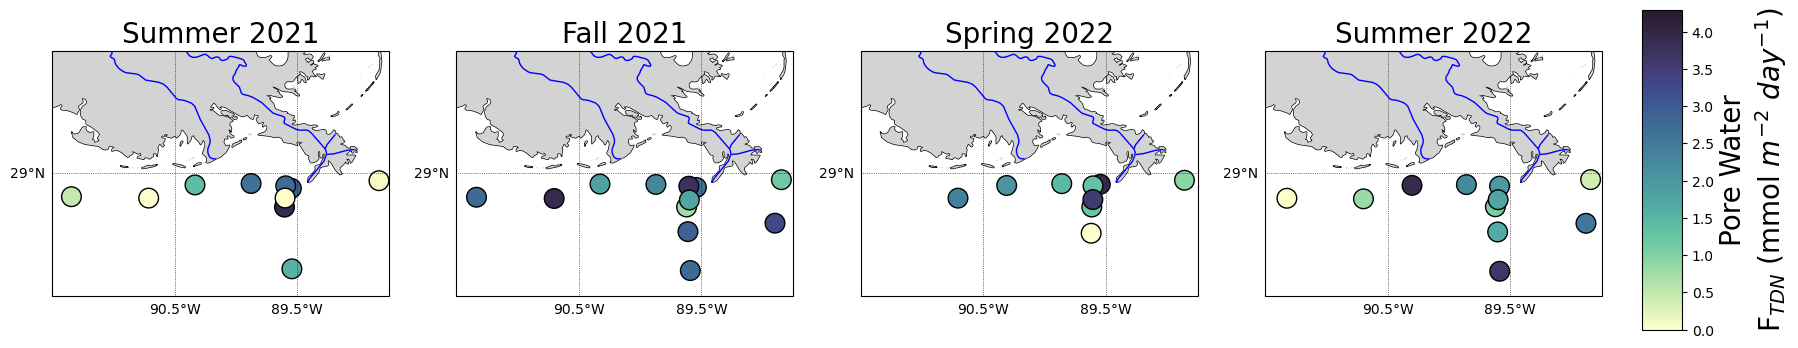

In [16]:
lat_top=30
lat_bot=28
lon_left=-91.5
lon_rigth=-88.75
extent=[lon_left, lon_rigth, lat_bot, lat_top]
res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
#set params 
data_f = df
topic = "pw_flux_doc"
cb_name = r'Pore Water'+'\n'+r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_tn"
cb_name = r'Pore Water'+'\n'+r'F$_{TDN}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

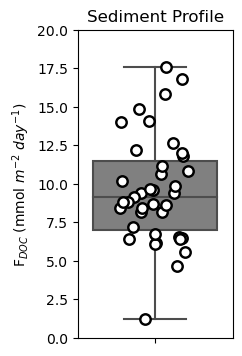

In [17]:
# Create a boxplot for pw_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['pw_flux_doc'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['pw_flux_doc'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylim(0,20)
plt.show()

C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:       OCkg_5cm_deep_M3   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3.125
Date:                Sun, 03 Mar 2024   Prob (F-statistic):             0.0881
Time:                        20:39:35   Log-Likelihood:                -30.596
No. Observations:                  17   AIC:                             83.19
Df Residuals:                       6   BIC:                             92.36
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

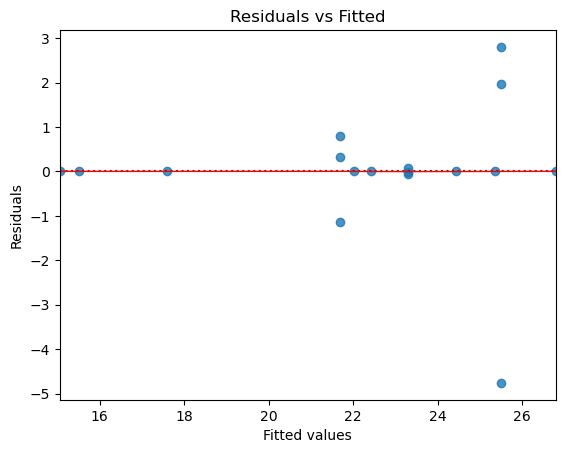

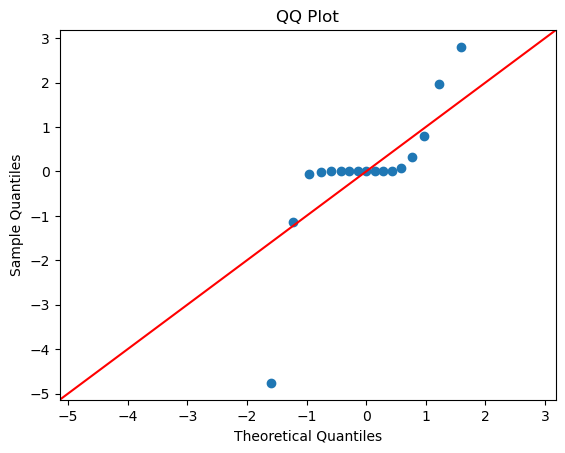

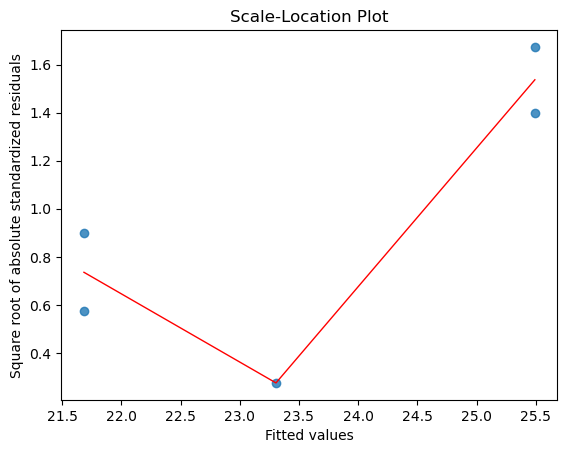

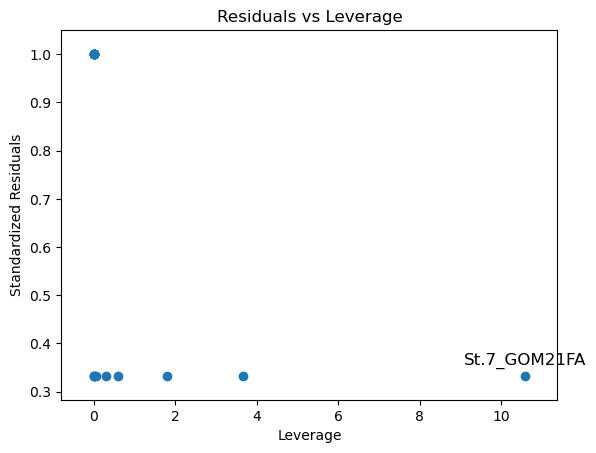

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_18844\3548829127.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['OCkg_5cm_deep_M3_pred'] = predicted


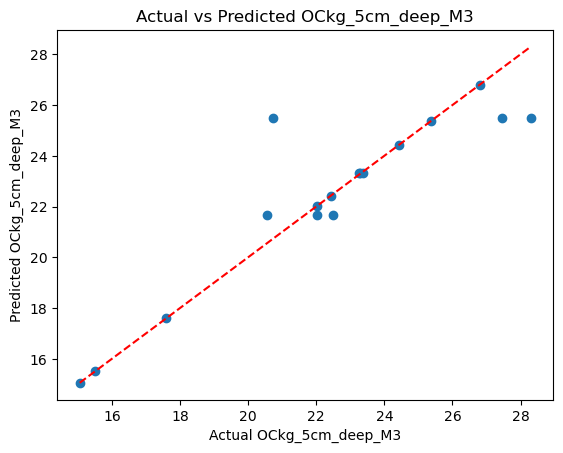

In [18]:
# Define the formula for linear regression
df_2 = df.dropna(subset=['OCkg_5cm_deep_M3'])

# Define the formula for linear regression
formula = 'OCkg_5cm_deep_M3 ~ rgn * season'

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_2).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_2)

# Insert predictions back to dataframe
df_2['OCkg_5cm_deep_M3_pred'] = predicted

# Plot
plt.scatter(df_2['OCkg_5cm_deep_M3'], predicted)
plt.xlabel('Actual OCkg_5cm_deep_M3')
plt.ylabel('Predicted OCkg_5cm_deep_M3')
plt.title('Actual vs Predicted OCkg_5cm_deep_M3')
plt.plot([df_2['OCkg_5cm_deep_M3'].min(), df_2['OCkg_5cm_deep_M3'].max()], 
         [df_2['OCkg_5cm_deep_M3'].min(), df_2['OCkg_5cm_deep_M3'].max()], 'r--')
plt.show()

OCkg_5cm_deep_M3 = 17.5949 * Intercept + 9.2020 * rgn[T.riv] + 7.8979 * rgn[T.shelf] + -2.5403 * rgn[T.slope] + 4.4152 * season[T.spring] + 4.8324 * season[T.summer] + -6.7784 * rgn[T.riv]:season[T.spring] + -8.2250 * rgn[T.shelf]:season[T.spring] + -0.0000 * rgn[T.slope]:season[T.spring] + -6.2624 * rgn[T.riv]:season[T.summer] + -7.0198 * rgn[T.shelf]:season[T.summer] + -4.3766 * rgn[T.slope]:season[T.summer] 


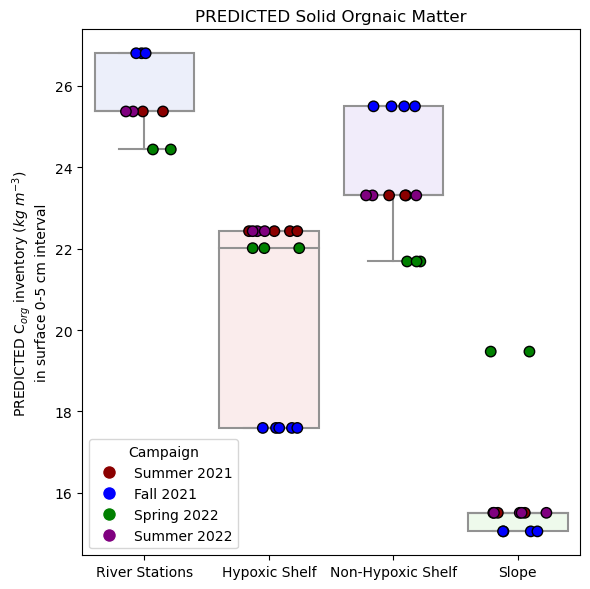

In [19]:
# Define the formula
formula = 'OCkg_5cm_deep_M3 ~ rgn * season'

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_2).fit()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()

# Print out the equation nicely
print("OCkg_5cm_deep_M3 =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

# Make predictions
# Insert predictions back to dataframe
predicted = model.predict(df)
df['OCkg_5cm_deep_M3_pred'] = predicted

# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'OCkg_5cm_deep_M3_pred': r'PREDICTED C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'OCkg_5cm_deep_M3_pred': 'PREDICTED Solid Orgnaic Matter',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'OCkg_5cm_deep_M3_pred': (0, 1500), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'OCkg_5cm_deep_M3_pred'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:            pw_flux_doc   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4.217
Date:                Sun, 03 Mar 2024   Prob (F-statistic):             0.0106
Time:                        20:39:38   Log-Likelihood:                -52.465
No. Observations:                  38   AIC:                             160.9
Df Residuals:                      10   BIC:                             206.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

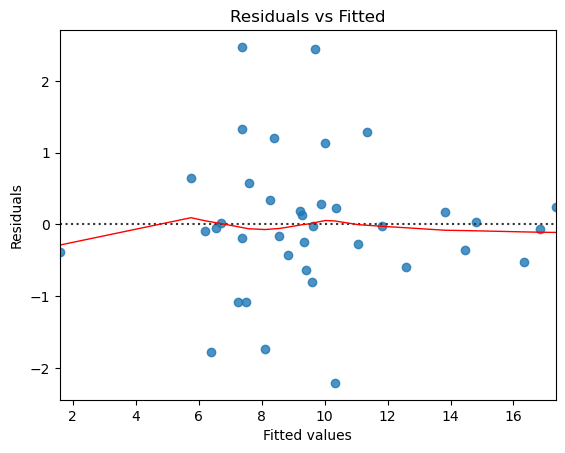

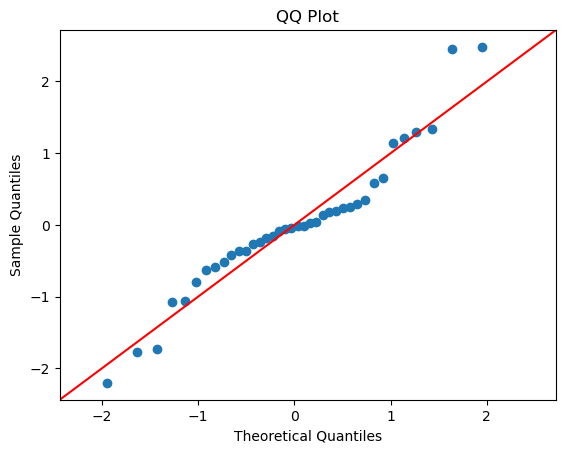

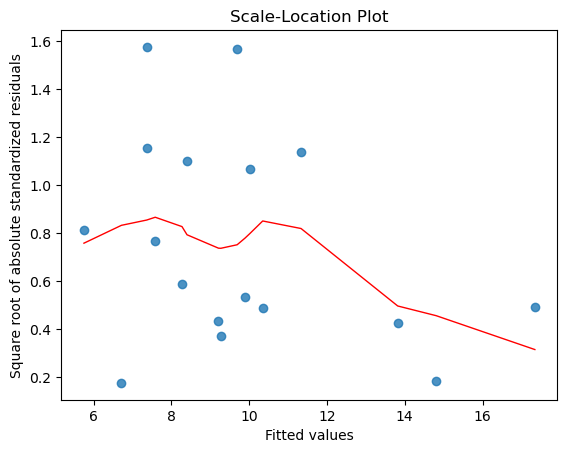

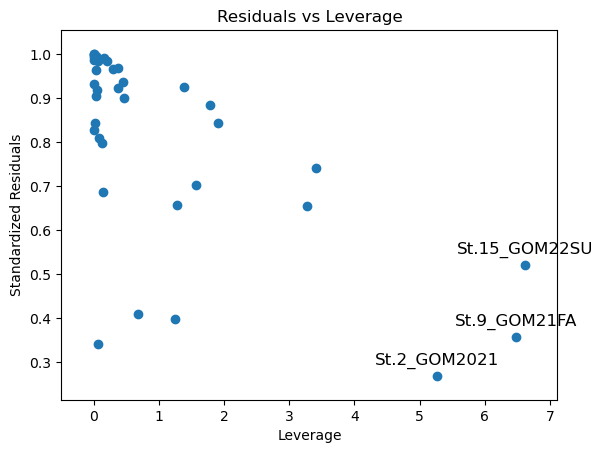

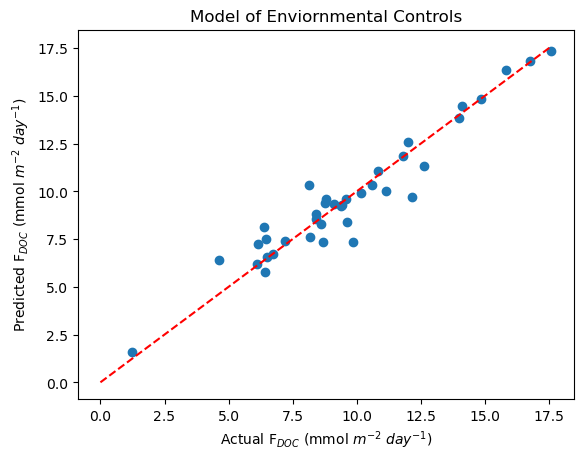

In [20]:
# Define the formula for linear regression
#0.313
#formula = 'pw_flux_doc ~ OCkg_5cm_deep_M3 * O2_uM_bottom + discharge_mi_ftps:distance_to_delta_km'

#0.756 without outlier drop 
#0.919 with St.16_GOM21FA dropped
formula = 'pw_flux_doc ~ OCkg_5cm_deep_M3_pred * O2_uM_bottom * Max_pressure * discharge_mi_ftps * distance_to_delta_km'

#formula = 'pw_flux_doc ~ pw_flux_tn + pw_flux_fe3'
#formula = 'pw_flux_doc ~ pw_flux_tn * O2_uM_bottom * discharge_mi_ftps * distance_to_delta_km'
#formula = 'pw_flux_doc ~ pw_flux_tn + O2_uM_bottom + discharge_mi_ftps + distance_to_delta_km'
#formula = 'pw_flux_doc ~ OCkg_5cm_deep_M3_pred * O2_uM_bottom'

#formula = 'pw_flux_doc ~ OCkg_5cm_deep_M3_pred * O2_uM_bottom + discharge_mi_ftps * distance_to_delta_km'

# Fit the linear regression model
df_t = df.drop('St.16_GOM21FA')
#df_t = df

model = sm.formula.ols(formula=formula, data=df_t).fit()
print(model.summary())

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()

# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_t)

# Insert predictions back to dataframe
df_t['pw_flux_doc_pred'] = predicted

# Plot
plt.scatter(df_t['pw_flux_doc'], predicted)
plt.xlabel(r'Actual F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylabel(r'Predicted F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.title('Model of Enviornmental Controls')
plt.plot([0, df_t['pw_flux_doc'].max()], 
         [0, df_t['pw_flux_doc'].max()], 'r--')
plt.show()


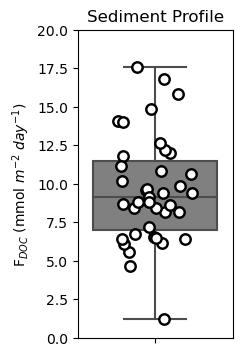

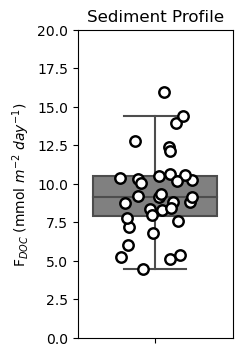

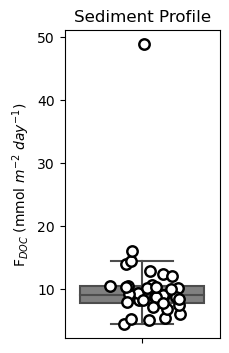

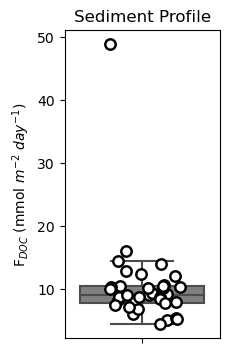

In [33]:
df_hypox = df_t
df_percep = df_t

df_hypox['O2_uM_bottom'] = df_hypox['O2_uM_bottom']/1.5
df_percep['discharge_mi_ftps'] = df_percep['discharge_mi_ftps']*1.5

predicted = model.predict(df_hypox)
df_t['pw_flux_doc_pred_hypoxia'] = predicted

predicted = model.predict(df_percep)
df_t['pw_flux_doc_pred_river'] = predicted


# Create a boxplot for pw_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df_t['pw_flux_doc'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df_t['pw_flux_doc'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylim(0,20)
plt.show()

plt.figure(figsize=(2, 4))
sns.boxplot(y=df_t['pw_flux_doc_pred'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df_t['pw_flux_doc_pred'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylim(0,20)
plt.show()

plt.figure(figsize=(2, 4))
sns.boxplot(y=df_t['pw_flux_doc_pred_hypoxia'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df_t['pw_flux_doc_pred_hypoxia'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
#lt.ylim(0,20)
plt.show()

plt.figure(figsize=(2, 4))
sns.boxplot(y=df_t['pw_flux_doc_pred_river'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df_t['pw_flux_doc_pred_river'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
#plt.ylim(0,20)
plt.show()

# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc_pred_hypoxia': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_doc_pred_river': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc_pred_hypoxia': 'Hypoxia Senario',
    'pw_flux_doc_pred_river': 'High River Inputs Senario',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 40), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'pw_flux_doc_pred_hypoxia'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df_t, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df_t, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

var = 'pw_flux_doc'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df_t, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df_t, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:            pw_flux_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.241
Date:                Sun, 03 Mar 2024   Prob (F-statistic):              0.336
Time:                        20:39:41   Log-Likelihood:                -73.199
No. Observations:                  32   AIC:                             178.4
Df Residuals:                      16   BIC:                             201.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

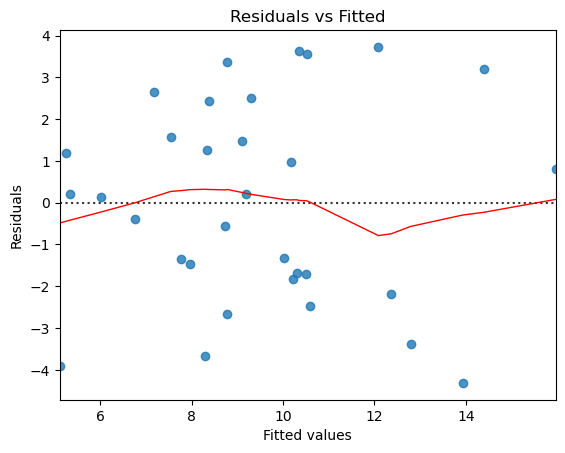

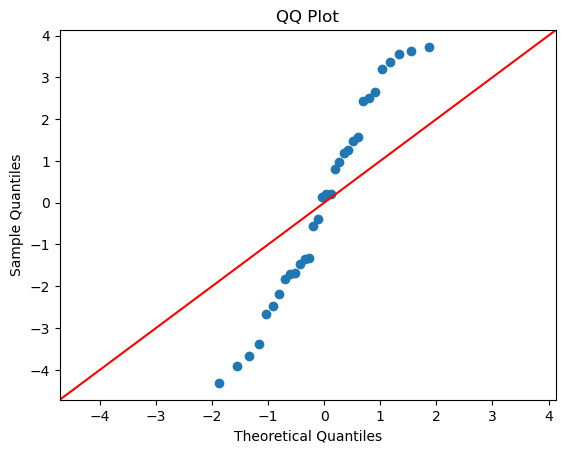

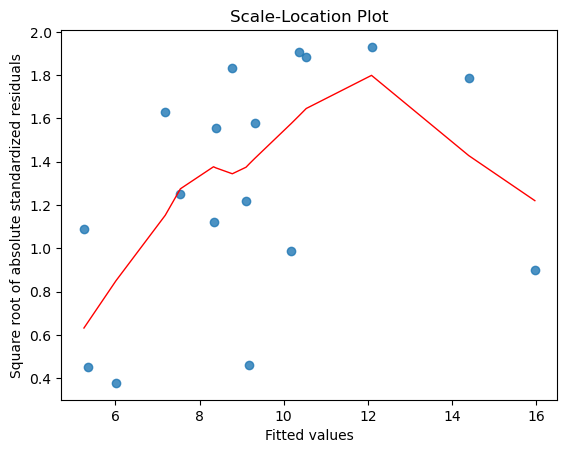

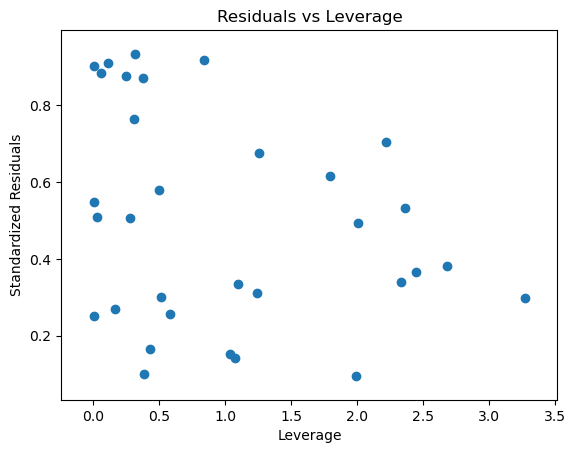

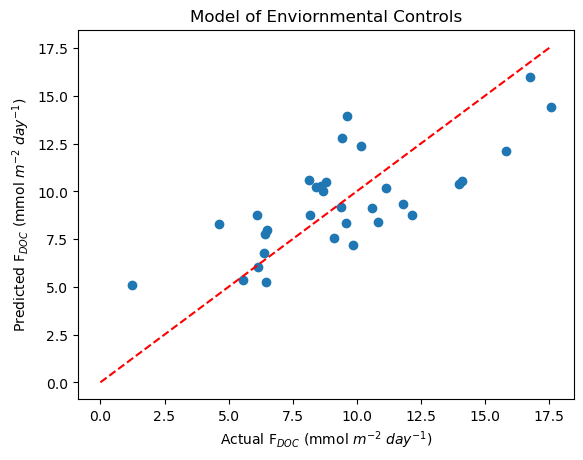

In [22]:
#df_t = df.drop('St.16_GOM21FA')
df_t = df
df_t['Fe2_m3'] = df_t["Fe2/m2"]
df_t['Fe3_m3'] = df_t["Fe3/m2"]

# Define the formula for linear regression
formula = 'pw_flux_doc ~ pw_flux_tn * Fe2_m3 * Fe3_m3 * mean_NPOC_uM'

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_t).fit()
print(model.summary())

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()

# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_t)

# Insert predictions back to dataframe
df_t['pw_flux_doc_pred'] = predicted

# Plot
plt.scatter(df_t['pw_flux_doc'], predicted)
plt.xlabel(r'Actual F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylabel(r'Predicted F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.title('Model of Internal Controls')
plt.plot([0, df_t['pw_flux_doc'].max()], 
         [0, df_t['pw_flux_doc'].max()], 'r--')
plt.show()


In [23]:
df.columns

Index(['camp', 'station', 'date', 'Max_pressure', 'Pressure_dbar_surface',
       'O2_mgL_surface', 'latitude_surface', 'longitude_surface',
       'Pressure_dbar_bottom', 'O2_mgL_bottom', 'latitude_bottom',
       'longitude_bottom', 'O2_uM_surface', 'O2_uM_bottom', 'Slope',
       'Slope_pressure', 'Slope_pressure_percent', 'Camp', 'Stn',
       'Cg_5cm_deep/M2', 'Cg_15cm_deep/M2', 'Cg_30cm_deep/M2',
       'OCg_5cm_deep/M2', 'OCg_15cm_deep/M2', 'OCg_30cm_deep/M2',
       'ICg_5cm_deep/M2', 'ICg_15cm_deep/M2', 'ICg_30cm_deep/M2',
       'Ng_5cm_deep/M2', 'Ng_15cm_deep/M2', 'Ng_30cm_deep/M2',
       'Sg_5cm_deep/M2', 'Sg_15cm_deep/M2', 'Sg_30cm_deep/M2',
       'discharge_mi_ftps', 'discharge_af_ftps', 'Lat', 'Lon', 'Fe2:Fe3',
       'Fe3:Fe2', 'Fe2/m2', 'Fe3/m2', 'FeT/m2', 'mean_NPOC_uM', 'max_depth',
       'NPOC_uM_per_cubic_meter', 'NPOC_uMol_Stock_wc', 'bc_slope_inflec',
       'r2_slope_inflec', 'bc_flux_aCDOM412', 'pw_flux_aCDOM412',
       'bc_flux_aCDOM350', 'pw_flux_aCDOM350

In [24]:
df['mean_NPOC_uM']

code
St.11_GOM2021         2.274351
St.13_GOM2021        18.588655
St.14_GOM2021        54.103750
St.15_GOM2021         7.636075
St.16_GOM2021       138.671739
St.2_GOM2021         84.898781
St.4_GOM2021        105.391213
St.5B_GOM2021      1394.796333
St.7_GOM2021         56.256494
St.9_GOM2021          5.292787
St.MK_GOM2021       129.648745
St.ML_GOM2021      4369.160819
St.11_GOM21FA         1.616631
St.12_GOM21FA         7.723303
St.13_GOM21FA              NaN
St.14_GOM21FA        22.807356
St.14.5_GOM21FA    1034.344235
St.15_GOM21FA         8.789522
St.16_GOM21FA       159.345778
St.16-2_GOM21FA     543.420928
St.2_GOM21FA        772.562398
St.4_GOM21FA        188.194840
St.5B_GOM21FA       731.380589
St.6_GOM21FA        153.403033
St.7_GOM21FA          4.665644
St.9_GOM21FA         59.198253
St.MK_GOM21FA       326.050859
St.MK-2_GOM21FA    3848.100157
St.13_GOM22SP        38.772036
St.14_GOM22SP        18.753421
St.15_GOM22SP         5.752576
St.16_GOM22SP       274.608411
St.